## pCMV-Target-AID construction
The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID, which were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048.

In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
#Load GenBank input from the benchling share link
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID")

<queen.QUEEN object; project='pcDNA31_Target_AID', length='10419 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "The N-terminus of Target-AID (fragment1) was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) \
(Addgene 79620) using primer pairs RS045/HM129."
QUEEN("GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG", product="RS045")
QUEEN("CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", product="HM129")
pcDNA31_Target_AID.searchsequence(RS045.seq[-18:], product="FW1", pn=processname1, pd=description1)
pcDNA31_Target_AID.searchsequence(HM129.seq[-18:], product="RV1", pn=processname1, pd=description1)
cropdna(pcDNA31_Target_AID, FW1[0].end, RV1[0].start, product="extract1", pn=processname1, pd=description1)
modifyends(extract1, RS045.seq, HM129.rcseq, product="fragment1", pn=processname1, pd=description1) 

<queen.QUEEN object; project='fragment1', length='2596 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "The C-terminus of Target-AID (fragment2) was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs HM128/RS046."
QUEEN(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC", product="HM128")
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046")
pcDNA31_Target_AID.searchsequence(HM128.seq[-18:], product="FW2", pn=processname2, pd=description2)
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV2", pn=processname2, pd=description2)
f2 = cropdna(pcDNA31_Target_AID, FW2[0].end, RV2[0].start, product="extract2", pn=processname2, pd=description2)
modifyends(extract2, HM128.seq, RS046.rcseq, product="fragment2", pn=processname2, pd=description2)

<queen.QUEEN object; project='fragment2', length='2831 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "The backbone fragment (fragment3) was amplified from pCMV-ABE7.10 using RS047/RS048"
QUEEN("ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", product="RS047")
QUEEN("CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG", product="RS048")
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW3", pn=processname3, pd=description3) 
pCMV_ABE.searchsequence(RS048.seq[-18:], product="RV3", pn=processname3, pd=description3)
f3 = cropdna(pCMV_ABE, FW3[0].end, RV3[0].start, product="extract3", pn=processname3, pd=description3)
modifyends(extract3, RS047.seq, RS048.rcseq, product="fragment3", pn=processname3, pd=description3)

<queen.QUEEN object; project='fragment3', length='3403 bp', topology='linear'>

In [7]:
processname4 = "Gibson Assembly"
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed \
by assembling the two insert fragments and the backbone fragment."
modifyends(fragment1, "*{25}/-{25}","-{28}/*{28}", product="fragment1_mod", pn=processname4, pd=description4)
modifyends(fragment2, "*{28}/-{28}","-{25}/*{25}", product="fragment2_mod", pn=processname4, pd=description4)
modifyends(fragment3, "*{25}/-{25}","-{25}/*{25}", product="fragment3_mod", pn=processname4, pd=description4) 
joindna(fragment1_mod, fragment2_mod, fragment3_mod, topology="circular", product="pCMV_Target_AID", pn=processname4, pd=description4)

<queen.QUEEN object; project='pCMV_Target_AID', length='8752 bp', topology='circular'>

In [8]:
pCMV_Target_AID.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        source              0      3308  +       
100         primer_bind   M13 Reverse         275    292   -       
200         primer_bind   M13/pUC Reverse     288    311   -       
300         protein_bind  lac operator        299    316   +       
400         promoter      lac promoter        323    354   -       
500         protein_bind  CAP binding site    368    390   +       
600         primer_bind   L4440               506    524   -       
700         rep_origin    ori                 677    1266  -       
800         primer_bind   pBR322ori-F         757    777   -       
900         CDS           AmpR                1436   2297  -       
1000        primer_bind   Amp-R               2059   2079  +       
1100        promoter      AmpR promoter       2297   2402  -       
1200        primer_bind   pRS-marker          2480   2500  -       
1300        enhancer      CMV enhancer        26

In [9]:
#Verification of quine code
quine(pCMV_Target_AID, execution=True)

The quine code correctly reconstructed the given QUEEN object.


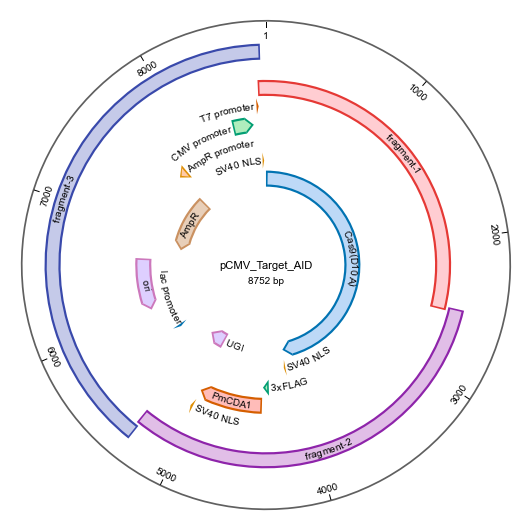

In [10]:
#Visuailze annotated sequence map
list600  = ["#E53935","#D81B60","#8E24AA","#5E35B1","#3949AB","#1E88E5","#039BE5","#00ACC1","#00897B","#43A047","#7CB342","#C0CA33","#FDD835","#FFB300","#FB8C00","#F4511E","#6D4C41","#546E7A"]
list100  = ["#ffcdd2","#f8bbd0","#e1bee7","#d1c4e9","#c5cae9","#bbdefb","#b3e5fc","#b2ebf2","#b2dfdb","#c8e6c9","#dcedc8","#f0f4c3","#fff9c4","#ffecb3","#ffe0b2","#ffccbc","#d7ccc8","#cfd8dc"]
color_sets = list(zip(list600,list100))
color_sets = [color_sets[0], color_sets[2], color_sets[4], color_sets[5], color_sets[7], color_sets[1], color_sets[3], color_sets[9], color_sets[10], color_sets[12], color_sets[14], color_sets[16], color_sets[11], color_sets[17]]

def add_fragment_annotation(dna, fragment, fragment_id, color_set):
    f = dna.searchsequence(fragment.seq)
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute("f{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:label", operation=createattribute("fragment-{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="strand", operation=replaceattribute(0), new_copy=False)

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")
    plasmid = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular") 
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+")
    for i in range(len(fragments)):
        fragments[i].location.strand = 0
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments
    fig       = visualizedna(plasmid, feature_list=features, map_view="circular", tick_space=1000, title=dna.project)
    return fig, plasmid

add_fragment_annotation(pCMV_Target_AID, fragment1, "1", color_sets[0])
add_fragment_annotation(pCMV_Target_AID, fragment2, "2", color_sets[1])
add_fragment_annotation(pCMV_Target_AID, fragment3, "3", color_sets[2])
fig, plasmid = visualization(pCMV_Target_AID)

In [11]:
plasmid.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
100         CDS           Cas9(D10A)          0      4104  +       
200         source        source              0      5299  +       
300         misc_feature  fragment-2          2504   5335  +       
400         CDS           SV40 NLS            4116   4137  +       
500         CDS           3xFLAG              4344   4410  +       
600         CDS           PmCDA1              4416   5043  +       
700         CDS           SV40 NLS            5043   5064  +       
800         CDS           UGI                 5070   5322  +       
900         misc_feature  fragment-3          5310   8713  +       
1000        source        source              5345   8681  +       
1100        primer_bind   BGH-rev             5347   5365  -       
1200        polyA_signal  bGH poly(A) signal  5353   5578  +       
1300        primer_bind   M13 Reverse         5648   5665  -       
1400        primer_bind   M13/pUC Reverse     56

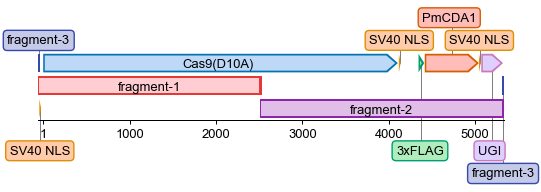

In [23]:
fig = visualizedna(plasmid, start=8688, end=5335, width_scale=0.40, tick_space=1000, title_visible=False, fontsize=13, height_scale=1.05)
fig.savefig("output/fig2c.pdf", bbox_inches="tight")

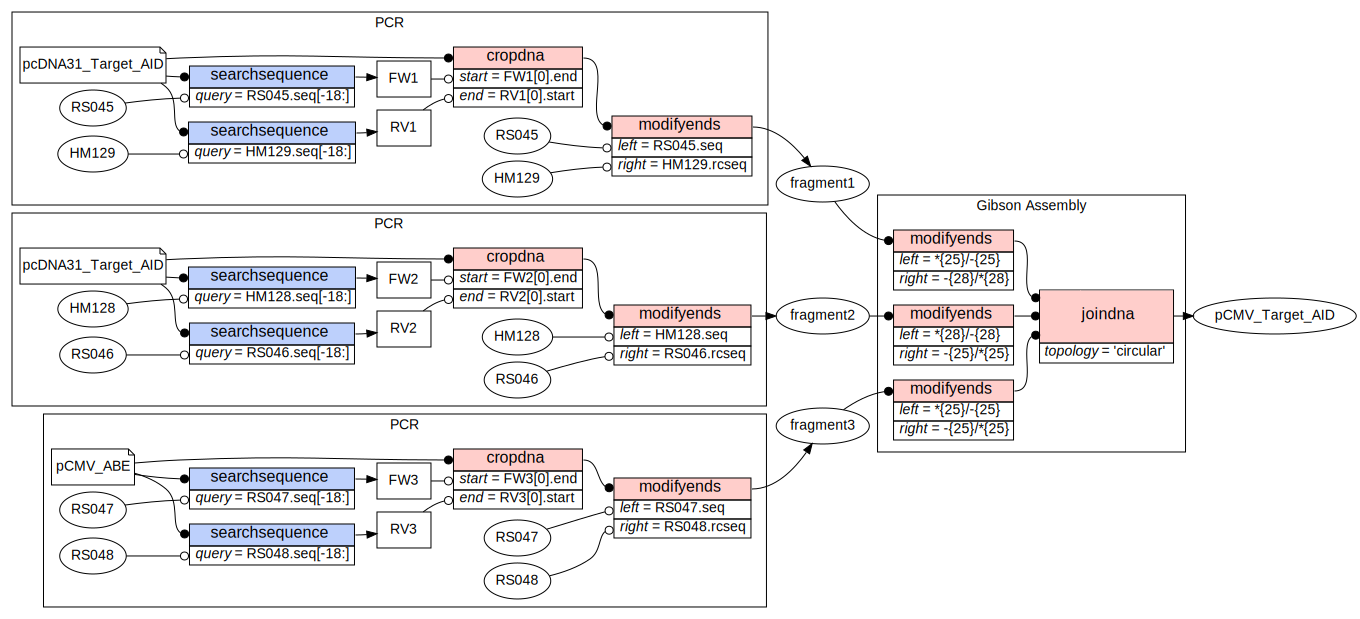

In [14]:
#Visualize construction flow
flow = visualizeflow(pCMV_Target_AID)
flow.render("output/pCMV_Target_AID_construction")
flow

In [12]:
pCMV_Target_AID.writedna("output/pCMV-Target-AID.gbk")